<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/Heart_Disease_With_KNN_GridSearchCV_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

An R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

With the help of KNN Classifier, the dataset is to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

The dataset can be downloaded from the kaggle website link here: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

In [27]:
# Importing all dependences
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
hrt = pd.read_csv('heart_disease_prediction.csv') # Reading data into pandas dataframe

hrt.head() # Display the first few roles of the dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
hrt.shape # Number of Observation & Features

(918, 12)

In [30]:
hrt.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [31]:
hrt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Based on the descriptive statistics, here are some of the observations that we can make:

- The average age of patients is ~53 years.
- The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
- RestingBP and Cholesterol have a minimum value of zero.
- There don't seem to be any missing values in these columns.

In [32]:
for col in hrt.columns:
    pct_missing = np.mean(hrt[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Age - 0.0%
Sex - 0.0%
ChestPainType - 0.0%
RestingBP - 0.0%
Cholesterol - 0.0%
FastingBS - 0.0%
RestingECG - 0.0%
MaxHR - 0.0%
ExerciseAngina - 0.0%
Oldpeak - 0.0%
ST_Slope - 0.0%
HeartDisease - 0.0%


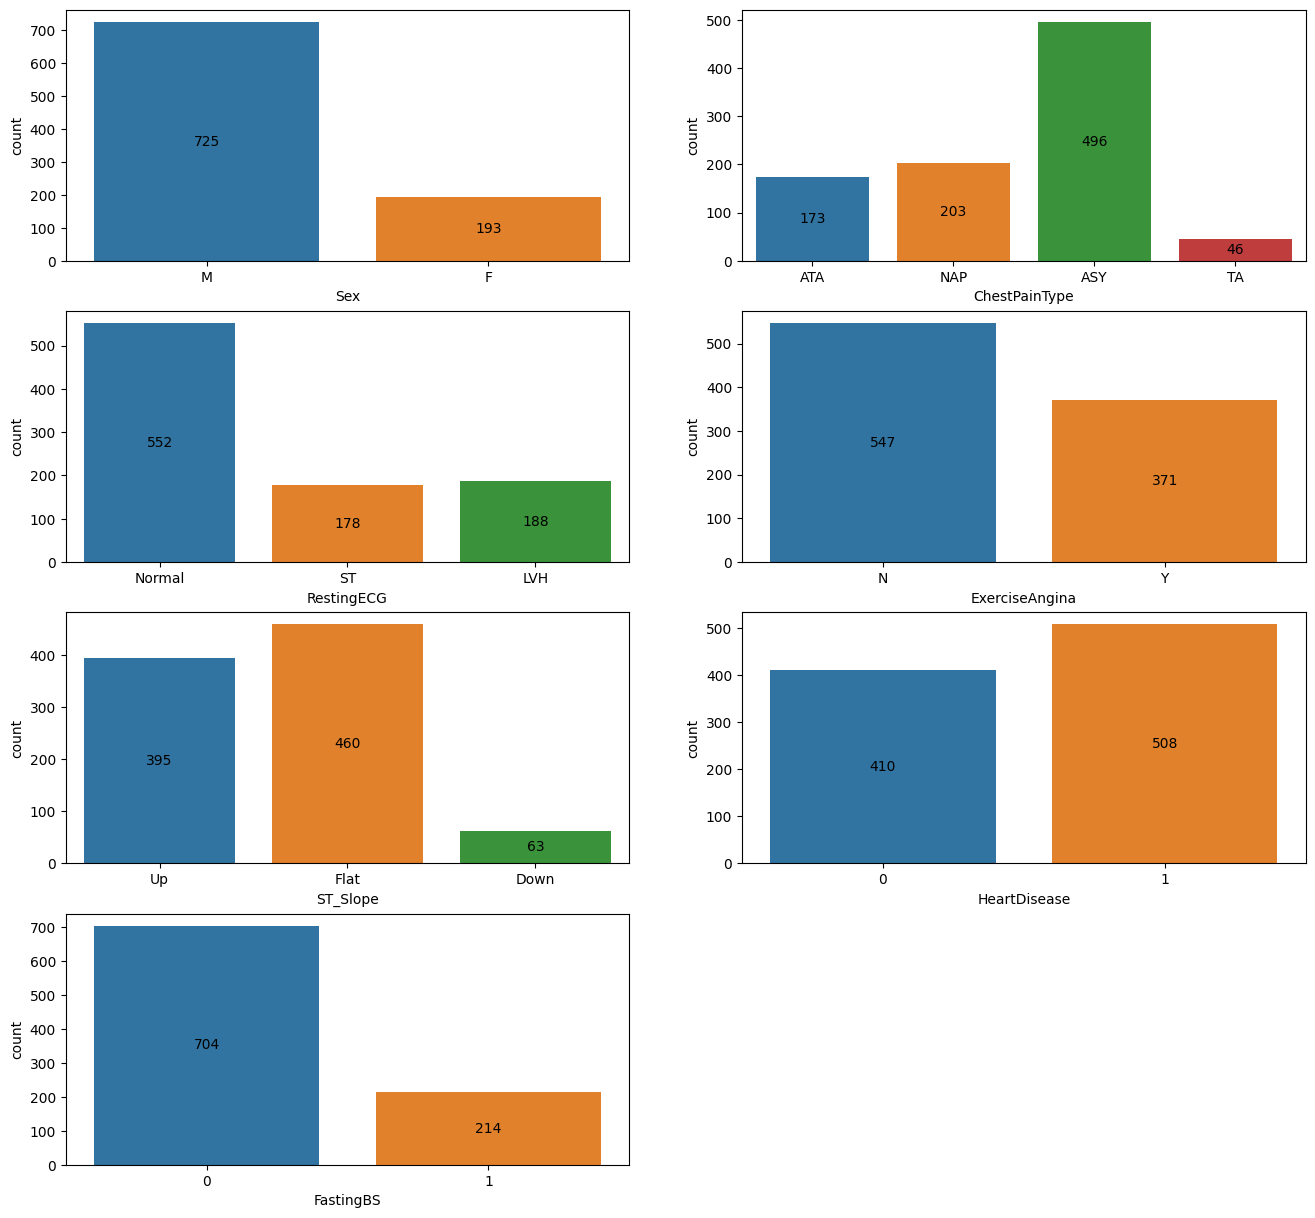

In [33]:
cat_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'FastingBS']

# A bar chart that displays the number of rows for each category of that column.
fig = plt.figure(figsize=(16, 15))
for i, col in enumerate(cat_col):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(x=hrt[col], ax=ax)
    
    for con in ax.containers:
        ax.bar_label(con, label_type="center")

- The dataset is highly skewed towards male patients. There are 725 male patients and 193 female patients. This could potentially induce a bias in our model.
- 496 patients had ASY (asymptotic) chest pain type.
- 552 patients had a normal restin ECG.
- 704 patients had blood sugar lower than 120 mg/dl

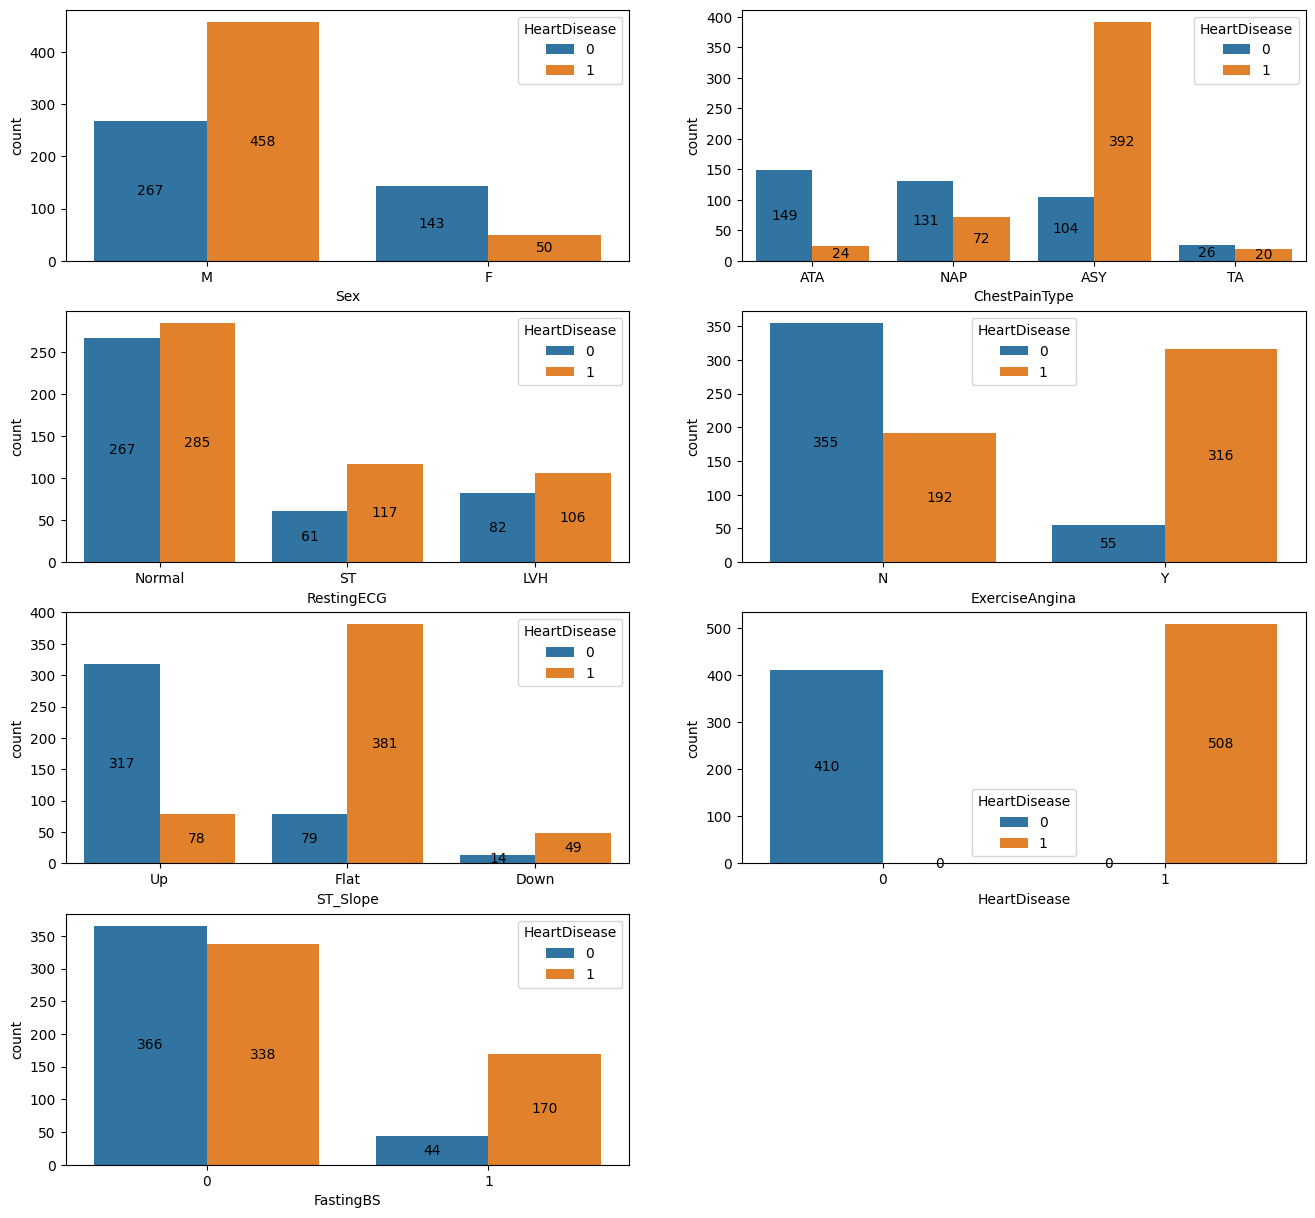

In [34]:
# A bar chart that displays the number of rows for each category of that column, grouped by HeartDisease.
fig = plt.figure(figsize=(16, 15))
for i, col in enumerate(cat_col):
    ax = plt.subplot(4, 2, i+1)
    sns.countplot(x=hrt[col], hue= hrt['HeartDisease'], ax=ax)
    
    for con in ax.containers:
        ax.bar_label(con, label_type="center")

- We can further notice how skewed the dataset is towards male patients. Only 50 female patients in the dataset have been diagnosed with heart disease.
- A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, asymptomatic implies that those patients who had a heart disease did not have chest pain as a symptom.
- A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not diagnosed as such.
- Out of all patients who had an exercise-induced angina, 316 were diagnosed with a heart disease.
- Out of all patients with a flat ST slope, 381 were diagnosed with a heart disease.

In [35]:
rest = hrt['RestingBP'] == 0
# Checking for 0 values in this column
rest.value_counts()

False    917
True       1
Name: RestingBP, dtype: int64

In [36]:
cho = hrt['Cholesterol'] == 0
# Checking for 0 values in this column
cho.value_counts()

False    746
True     172
Name: Cholesterol, dtype: int64

In [37]:
hrt_c = hrt.copy()

RestingBP has only one zero value. We can remove that row from consideration. There are 172 zero values for Cholesterol. That's a relatively high number. We can't remove them all and replacing those values with the median might not be an ideal approach, but that's what we will go for now.

To be more accurate, we will replace the zero values in Cholesterol in relation to HeartDisease. So, the 0 values in Cholesterol for patients who were diagnosed with a heart disease will be replaced by the median of the non-zero values for patients who were diagnosed with a heart disase. And we'll do the same for those who were not diagnosed with a heart disease.

In [12]:
hrt_c = hrt_c[hrt_c['RestingBP'] != 0 ] # Removing the row with 0 values from the dataframe

hrt_c.loc[hrt_c['HeartDisease'] == 0, 'Cholesterol'] = hrt_c.loc[hrt_c['HeartDisease'] == 0, 'Cholesterol'].replace(to_replace=0, value=hrt_c.loc
                                                             [hrt_c['HeartDisease'] == 0, 'Cholesterol'].median())

hrt_c.loc[-hrt_c['HeartDisease'] == 0, 'Cholesterol'] = hrt_c.loc[-hrt_c['HeartDisease'] == 0, 'Cholesterol'].replace(to_replace=0, value=hrt_c.loc
                                                              [-hrt_c['HeartDisease'] == 0, 'Cholesterol'].median())

In [13]:
hrt_c[['RestingBP', 'Cholesterol']].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,203.967285
std,17.999749,105.178550
min,80.000000,0.000000
25%,120.000000,182.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


In [14]:
hrt_c = pd.get_dummies(hrt_c, drop_first=True)

In [15]:
hrt_c.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


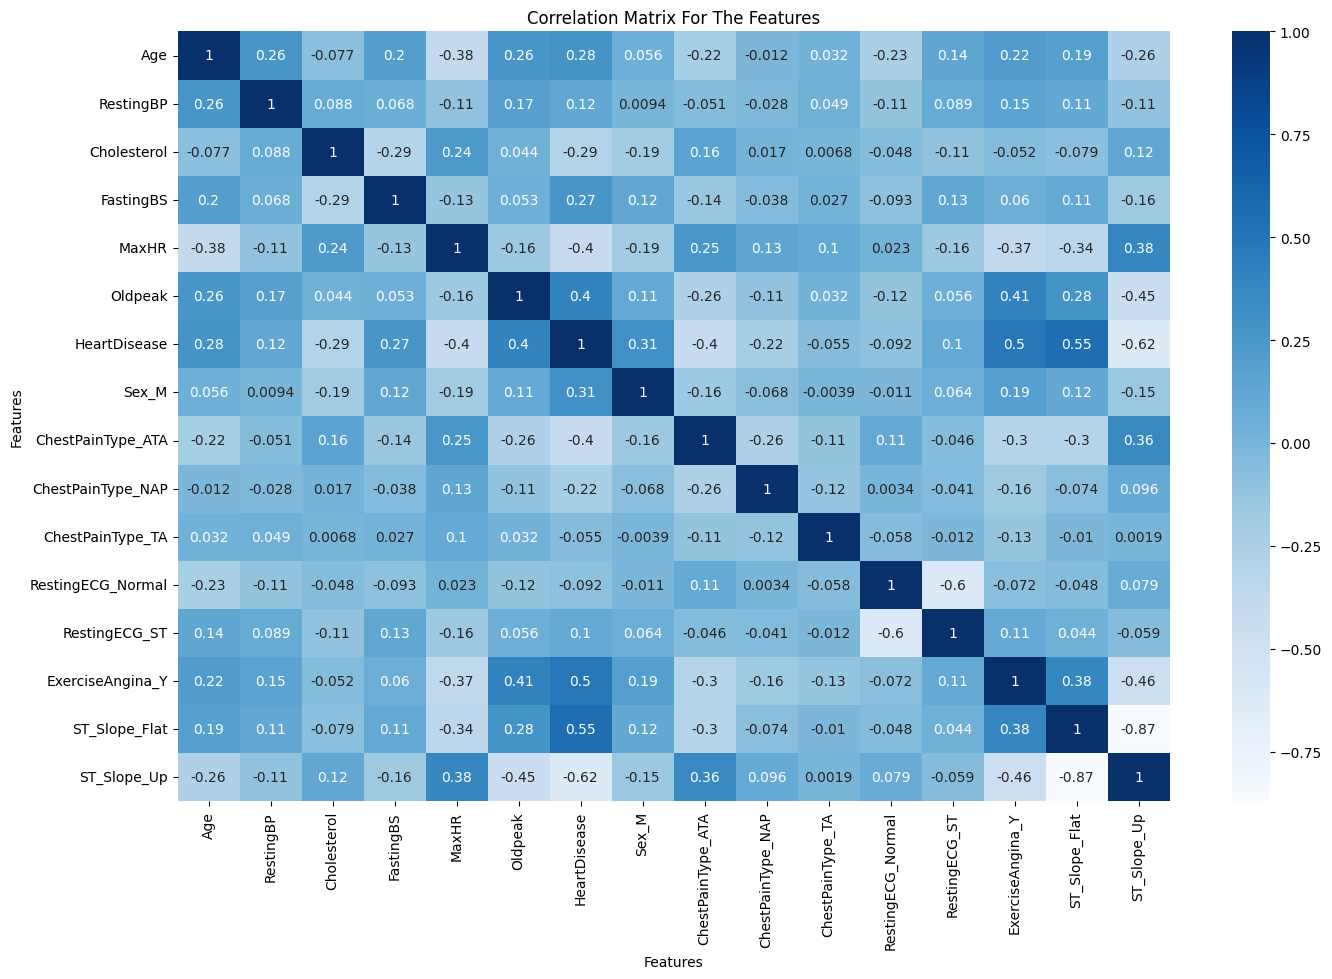

In [16]:
correlation_matrix = hrt_c.corr(method='pearson')

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix For The Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
     

In [17]:
real = correlation_matrix['HeartDisease'].sort_values(ascending=False)[1:5].index

real

Index(['ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'Sex_M'], dtype='object')

In [18]:
# Features that are strongly (+ or -) correlated to HeartDisease
high_corr = ['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'Sex_M']

# Spliting our dataset into train, validation and test

X= hrt_c.drop('HeartDisease', axis=1)
y = hrt_c['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2*X.shape[0]/X_train.shape[0], random_state=17)

Creating a model for each of the features above that correlated high with the labels and evaluate their performance using accuracy as a metric

In [19]:
for i in high_corr:
    model = KNeighborsClassifier(n_neighbors = 4)
    model.fit(X_train[[i]], y_train)
    accuracy = model.score(X_val[[i]], y_val)
    print(f"The k-NN classifier trained on {i} and with k = 4 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 85.51%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 82.61%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 77.54%
The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 61.59%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 43.48%


Our best performing model, with an accuracy of ~82%, was trained on the ST_Slope_Flat feature, followed by ExerciseAngina_Y being a close second. These make sense given the data distributions we saw previously.

In [20]:
# Normalizing the dataset

scalar = MinMaxScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)

In [21]:
# Training our model

model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 86.23


In [22]:
# We will evaluate our model on our test set now.
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 85.87


The model's accuracy jumped to ~86%! and the model evaluation is ~86%! for all features in the dataframe. Using all these features results in an improved model, but, let's see what parameters/hyperparameters might be optimal on some selected features.

We will use grid search to explore the following range of values for a couple of hyperparameters:

- For k (n_neighbors in scikit-learn) we will use values in the range of 1 to 20.
- We will use two distance metrics - minkwoski and manhattan.

minkwoski is the default metric for KNeighborsClassifier in sklearn.

In [23]:
# Improving the model by experimenting with the parameters and hyperparameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

X_train_feature = scalar.fit_transform(X_train[high_corr])

grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

model = KNeighborsClassifier()
model_grid = GridSearchCV(model, grid_params, scoring='accuracy')
model_grid.fit(X_train_feature, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [24]:
print(model_grid.best_score_*100, model_grid.best_params_)

84.33250620347395 {'metric': 'minkowski', 'n_neighbors': 12}


Our best model had an accuracy of ~84% with 12 n_neighbors and minkowski as the distance metric.

The accuracy of this model does not improve compared to without using the parameter. Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.

We will evaluate our model on our test set now.

In [25]:
X_test_scaled = scalar.transform(X_test[high_corr])
predictions = model_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 85.51


Comparing both models (both with or without parameters/hyperparameters and selected features) we can tell that our test accuracy is ~86%!